# Final Project for 720 using Food Inspection Data from Chicago Data Portal
This is a Python Jupyter Project using part of the Food Inspection Dataset from http://www.cityofchicago.org


This information is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP). For descriptions of the data elements included in this set, go to http://bit.ly/tS9IE8 

Inspiration-
Chicago is where I work and hang out so it is good to have an idea of the safest places to eat.

*New information added: -Data element discriptions, -Percentage of each area code failed, -Percentage of area codes passed. -(a fun attempt at) Inspection type in relation to pass/fail over time at the end. 

Here are the discriptions of the data eletments:

• Inspection date: This is the date the inspection occurred. A particular establishment is
likely to have multiple inspections which are denoted by different inspection dates.

• Inspection type: An inspection can be one of the following types: canvass, the most
common type of inspection performed at a frequency relative to the risk of the
establishment; consultation, when the inspection is done at the request of the owner
prior to the opening of the establishment; complaint, when the inspection is done in
response to a complaint against the establishment; license, when the inspection is done
as a requirement for the establishment to receive its license to operate; suspect food
poisoning, when the inspection is done in response to one or more persons claiming to
have gotten ill as a result of eating at the establishment (a specific type of complaint-
based inspection); task-force inspection, when an inspection of a bar or tavern is done.
Re-inspections can occur for most types of these inspections and are indicated as such.

• Results: An inspection can pass, pass with conditions or fail. Establishments receiving a
‘pass’ were found to have no critical or serious violations (violation number 1-14 and 15-
29, respectively). Establishments receiving a ‘pass with conditions’ were found to have
critical or serious violations, but these were corrected during the inspection.
Establishments receiving a ‘fail’ were found to have critical or serious violations that
were not correctable during the inspection. An establishment receiving a ‘fail’ does not
necessarily mean the establishment’s licensed is suspended. Establishments found to
be out of business or not located are indicated as such.

• Violations: An establishment can receive one or more of 45 distinct violations (violation
numbers 1-44 and 70). For each violation number listed for a given establishment, the
requirement the establishment must meet in order for it to NOT receive a violation is
noted, followed by a specific description of the findings that caused the violation to be
issued. 

•Type of facility: Each establishment is described by one of the following: bakery, banquet
hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care
center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6
combined), gas station, Golden Diner, grocery store, hospital, long term care
center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school,
shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop.

• Risk category of facility: Each establishment is categorized as to its risk of adversely
affecting the public’s health, with 1 being the highest and 3 the lowest. The frequency of
inspection is tied to this risk, with risk 1 establishments inspected most frequently and
risk 3 least frequently. 


Zipcodes featured in dataset.

60607 - New Area/Work Area

60610 - Old Work Area

60622 - Old Home Area

Questions-

Which area code has the higest risks?

Pass and fail per area?

Violations and inspections per area codes?


In [1]:
#Importing modules to look at dataset. Then we are renaming the modules for easy access.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importing the dataset
#Taking a brief look at the first 10
food_inspection=pd.read_csv(r"C:\Users\RoboLov\OneDrive\Documents\MSIM Documents\MIS 720 Data Analytics\Final Presentation and Project\Food_Inspections3.csv")
food_inspection.head(10)

,InspectionID,DBAName,AKAName,LicenseNum,FacilityType,Risk,Address,City,State,Zip,InspectionDate,InspectionType,Results,Violations,Latitude,Longitude,Location
0,160210,ST CHRYSOSTOM'S CHURCH DAY SCHOOL,ST CHRYSOSTOM'S CHURCH DAY SCHOOL,20575,Daycare (2 - 6 Years),Risk 1 (High),1424 N DEARBORN ST,CHICAGO,IL,60610,1/5/2010,License,Fail,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.908544,-87.630272,"(41.90854430698586, -87.6302719697274)"
1,160209,CHICAGO SINAI CONGREGATION,CHICAGO SINAI CONGREGATION,75567,Daycare (2 - 6 Years),Risk 1 (High),15 W DELAWARE PL,CHICAGO,IL,60610,1/5/2010,License,Fail,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.899022,-87.628924,"(41.899021699577446, -87.62892425348232)"
2,120272,BLUE PLATE CATERING LTD.,BLUE PLATE CATERING LTD.,36436,Catering,Risk 1 (High),1061 W VAN BUREN ST,CHICAGO,IL,60607,1/5/2010,Consultation,Pass,NaN,41.876456,-87.654296,"(41.87645614541188, -87.65429579519606)"
3,160208,"LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC","LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC",1820997,NaN,Risk 1 (High),1327 N LARRABEE ST,CHICAGO,IL,60610,1/5/2010,Out of Business,Pass,NaN,41.905866,-87.643136,"(41.90586605268696, -87.6431361964551)"
4,160207,"LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC","LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC",1916128,Daycare (2 - 6 Years),Risk 1 (High),1327 N LARRABEE ST,CHICAGO,IL,60610,1/5/2010,License,Pass,NaN,41.905866,-87.643136,"(41.90586605268696, -87.6431361964551)"
5,160206,PAKEEZA,PAKEEZA,1991022,Restaurant,Risk 1 (High),1009-1011 N ORLEANS ST,CHICAGO,IL,60610,1/5/2010,License Re-Inspection,Pass,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.900828,-87.637189,"(41.900827710854195, -87.63718892231834)"
6,160212,MR. GYROS INC,MR. GYROS INC,1619550,Restaurant,Risk 1 (High),107 W DIVISION ST,CHICAGO,IL,60610,1/6/2010,Short Form Complaint,Fail,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.903785,-87.631800,"(41.90378484203853, -87.63179996351542)"
7,120277,POLK STREET CO.,POLK STREET CO.,29507,Restaurant,Risk 1 (High),548 W POLK ST,CHICAGO,IL,60607,1/6/2010,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.872113,-87.641305,"(41.87211261426958, -87.64130525460628)"
8,58229,FILTER COFFEE LOUNGE,FILTER,2013495,Restaurant,Risk 1 (High),1373 N MILWAUKEE AVE,CHICAGO,IL,60622,1/6/2010,Consultation,Fail,NaN,41.906868,-87.671749,"(41.90686820755232, -87.67174891786233)"
9,58230,CHICAGO CAFE CATERERS,CHICAGO CAFE CATERERS,1932046,Catering,Risk 1 (High),1629 W GRAND AVE,CHICAGO,IL,60622,1/6/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.890856,-87.668303,"(41.89085551482435, -87.66830289784055)"


In [3]:
#looking at data columns and rows. A great way to view our dataset quickly.
food_inspection.shape

(12971, 17)

In [4]:
'''searching the fields of the dataframe (table), this view also displays if the column is a int(Whole number), 
object (string), or float (approx number).'''
food_inspection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12971 entries, 0 to 12970
Data columns (total 17 columns):
InspectionID      12971 non-null int64
DBAName           12971 non-null object
AKAName           12860 non-null object
LicenseNum        12971 non-null int64
FacilityType      12750 non-null object
Risk              12964 non-null object
Address           12971 non-null object
City              12965 non-null object
State             12971 non-null object
Zip               12971 non-null int64
InspectionDate    12971 non-null object
InspectionType    12971 non-null object
Results           12971 non-null object
Violations        10367 non-null object
Latitude          12970 non-null float64
Longitude         12970 non-null float64
Location          12970 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 1.7+ MB


In [5]:
#Simplifed view for just columns.
food_inspection.columns

Index(['InspectionID', 'DBAName', 'AKAName', 'LicenseNum', 'FacilityType',
       'Risk', 'Address', 'City', 'State', 'Zip', 'InspectionDate',
       'InspectionType', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
#Cleaning up the database by droping unused columns.
food_inspection.drop(columns=['City', 'State','Latitude','Longitude','Location'])


,InspectionID,DBAName,AKAName,LicenseNum,FacilityType,Risk,Address,Zip,InspectionDate,InspectionType,Results,Violations
0,160210,ST CHRYSOSTOM'S CHURCH DAY SCHOOL,ST CHRYSOSTOM'S CHURCH DAY SCHOOL,20575,Daycare (2 - 6 Years),Risk 1 (High),1424 N DEARBORN ST,60610,1/5/2010,License,Fail,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...
1,160209,CHICAGO SINAI CONGREGATION,CHICAGO SINAI CONGREGATION,75567,Daycare (2 - 6 Years),Risk 1 (High),15 W DELAWARE PL,60610,1/5/2010,License,Fail,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...
2,120272,BLUE PLATE CATERING LTD.,BLUE PLATE CATERING LTD.,36436,Catering,Risk 1 (High),1061 W VAN BUREN ST,60607,1/5/2010,Consultation,Pass,NaN
3,160208,"LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC","LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC",1820997,NaN,Risk 1 (High),1327 N LARRABEE ST,60610,1/5/2010,Out of Business,Pass,NaN
4,160207,"LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC","LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC",1916128,Daycare (2 - 6 Years),Risk 1 (High),1327 N LARRABEE ST,60610,1/5/2010,License,Pass,NaN
5,160206,PAKEEZA,PAKEEZA,1991022,Restaurant,Risk 1 (High),1009-1011 N ORLEANS ST,60610,1/5/2010,License Re-Inspection,Pass,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...
6,160212,MR. GYROS INC,MR. GYROS INC,1619550,Restaurant,Risk 1 (High),107 W DIVISION ST,60610,1/6/2010,Short Form Complaint,Fail,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...
7,120277,POLK STREET CO.,POLK STREET CO.,29507,Restaurant,Risk 1 (High),548 W POLK ST,60607,1/6/2010,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...
8,58229,FILTER COFFEE LOUNGE,FILTER,2013495,Restaurant,Risk 1 (High),1373 N MILWAUKEE AVE,60622,1/6/2010,Consultation,Fail,NaN
9,58230,CHICAGO CAFE CATERERS,CHICAGO CAFE CATERERS,1932046,Catering,Risk 1 (High),1629 W GRAND AVE,60622,1/6/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...


In [7]:
#Still shows in the info? Cool beans.
food_inspection.columns

Index(['InspectionID', 'DBAName', 'AKAName', 'LicenseNum', 'FacilityType',
       'Risk', 'Address', 'City', 'State', 'Zip', 'InspectionDate',
       'InspectionType', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
#Finding missing values.
food_inspection.isna().sum()

InspectionID         0
DBAName              0
AKAName            111
LicenseNum           0
FacilityType       221
Risk                 7
Address              0
City                 6
State                0
Zip                  0
InspectionDate       0
InspectionType       0
Results              0
Violations        2604
Latitude             1
Longitude            1
Location             1
dtype: int64

In [9]:
#futher cleaning, Dropped NaN
food_inspection.dropna(axis='columns', how='all')

,InspectionID,DBAName,AKAName,LicenseNum,FacilityType,Risk,Address,City,State,Zip,InspectionDate,InspectionType,Results,Violations,Latitude,Longitude,Location
0,160210,ST CHRYSOSTOM'S CHURCH DAY SCHOOL,ST CHRYSOSTOM'S CHURCH DAY SCHOOL,20575,Daycare (2 - 6 Years),Risk 1 (High),1424 N DEARBORN ST,CHICAGO,IL,60610,1/5/2010,License,Fail,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.908544,-87.630272,"(41.90854430698586, -87.6302719697274)"
1,160209,CHICAGO SINAI CONGREGATION,CHICAGO SINAI CONGREGATION,75567,Daycare (2 - 6 Years),Risk 1 (High),15 W DELAWARE PL,CHICAGO,IL,60610,1/5/2010,License,Fail,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.899022,-87.628924,"(41.899021699577446, -87.62892425348232)"
2,120272,BLUE PLATE CATERING LTD.,BLUE PLATE CATERING LTD.,36436,Catering,Risk 1 (High),1061 W VAN BUREN ST,CHICAGO,IL,60607,1/5/2010,Consultation,Pass,NaN,41.876456,-87.654296,"(41.87645614541188, -87.65429579519606)"
3,160208,"LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC","LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC",1820997,NaN,Risk 1 (High),1327 N LARRABEE ST,CHICAGO,IL,60610,1/5/2010,Out of Business,Pass,NaN,41.905866,-87.643136,"(41.90586605268696, -87.6431361964551)"
4,160207,"LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC","LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC",1916128,Daycare (2 - 6 Years),Risk 1 (High),1327 N LARRABEE ST,CHICAGO,IL,60610,1/5/2010,License,Pass,NaN,41.905866,-87.643136,"(41.90586605268696, -87.6431361964551)"
5,160206,PAKEEZA,PAKEEZA,1991022,Restaurant,Risk 1 (High),1009-1011 N ORLEANS ST,CHICAGO,IL,60610,1/5/2010,License Re-Inspection,Pass,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.900828,-87.637189,"(41.900827710854195, -87.63718892231834)"
6,160212,MR. GYROS INC,MR. GYROS INC,1619550,Restaurant,Risk 1 (High),107 W DIVISION ST,CHICAGO,IL,60610,1/6/2010,Short Form Complaint,Fail,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.903785,-87.631800,"(41.90378484203853, -87.63179996351542)"
7,120277,POLK STREET CO.,POLK STREET CO.,29507,Restaurant,Risk 1 (High),548 W POLK ST,CHICAGO,IL,60607,1/6/2010,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.872113,-87.641305,"(41.87211261426958, -87.64130525460628)"
8,58229,FILTER COFFEE LOUNGE,FILTER,2013495,Restaurant,Risk 1 (High),1373 N MILWAUKEE AVE,CHICAGO,IL,60622,1/6/2010,Consultation,Fail,NaN,41.906868,-87.671749,"(41.90686820755232, -87.67174891786233)"
9,58230,CHICAGO CAFE CATERERS,CHICAGO CAFE CATERERS,1932046,Catering,Risk 1 (High),1629 W GRAND AVE,CHICAGO,IL,60622,1/6/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.890856,-87.668303,"(41.89085551482435, -87.66830289784055)"


In [10]:
#finding missing values, still there?
food_inspection.isna()

,InspectionID,DBAName,AKAName,LicenseNum,FacilityType,Risk,Address,City,State,Zip,InspectionDate,InspectionType,Results,Violations,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


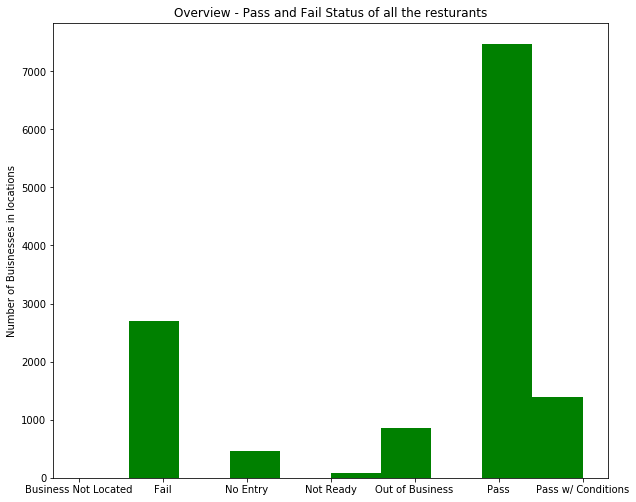

In [11]:
#Overview of the pass and fail status of the resturants in the all the zipcodes (60607,60611,60622)!

plt.hist(food_inspection.Results, color='green')

plt.ylabel('Number of Buisnesses in locations')
plt.title('Overview - Pass and Fail Status of all the resturants')
plt.tight_layout(-10)
plt.show()

In [12]:
#These are the risk levels in relation to the inspection results of the facilites.
pd.crosstab([food_inspection['Results'], food_inspection['Risk']], food_inspection['Zip'])

Zip                                   60607  60610  60622
Results              Risk                                
Business Not Located Risk 1 (High)        2      0      0
Fail                 All                  1      0      1
                     Risk 1 (High)      771    511    872
                     Risk 2 (Medium)     92     71    204
                     Risk 3 (Low)        26     45     98
No Entry             All                  1      0      0
                     Risk 1 (High)       80    107    207
                     Risk 2 (Medium)     13      9     35
                     Risk 3 (Low)         1      6      9
Not Ready            Risk 1 (High)       14     16     24
                     Risk 2 (Medium)      6      5     11
                     Risk 3 (Low)         1      2     11
Out of Business      Risk 1 (High)      185    154    208
                     Risk 2 (Medium)     44     34     73
                     Risk 3 (Low)        36     77     52
Pass                 Risk 1 (High)     2195   1464   2315
                     Risk 2 (Medium)    343    234    521
                     Risk 3 (Low)        76    118    189
Pass w/ Conditions   Risk 1 (High)      384    413    351
                     Risk 2 (Medium)     57     60    103
                     Risk 3 (Low)         3     10     13

Time to make groups!

In [13]:
Food60607=food_inspection['Zip']==60607

In [14]:
Food60610=food_inspection['Zip']==60610

In [15]:
Food60622=food_inspection['Zip']==60622

In [16]:
food_inspection_Food60607=food_inspection[Food60607]

In [17]:
food_inspection_Food60610=food_inspection[Food60610]

In [18]:
food_inspection_Food60622=food_inspection[Food60622]

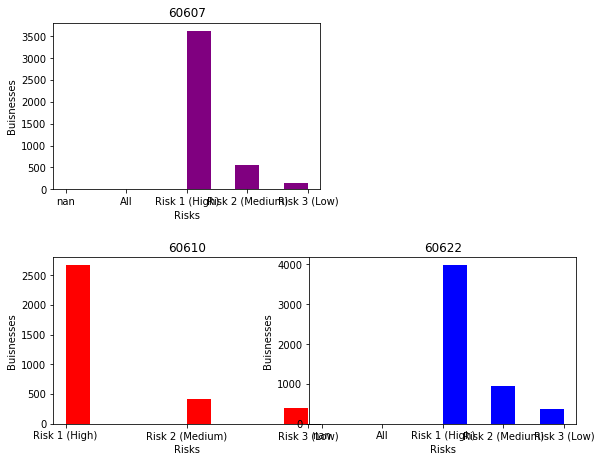

In [19]:
#Now we show each risk level. Kinda small/messy. Could be better.

plt.subplot(3,2,1)
plt.hist(food_inspection_Food60607.Risk, color ='purple')
plt.xlabel('Risks')
plt.ylabel('Buisnesses')
plt.title('60607') 

plt.subplot(3,2,5)
plt.hist(food_inspection_Food60610.Risk, color ='red')
plt.xlabel('Risks')
plt.ylabel('Buisnesses')
plt.title('60610') 

plt.subplot(3,2,6)
plt.hist(food_inspection_Food60622.Risk, color ='blue')
plt.xlabel('Risks')
plt.ylabel('Buisnesses')
plt.title('60622') 

plt.tight_layout(-8)

plt.show()

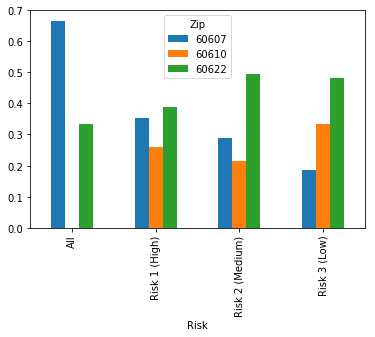

In [20]:
#Better layout of risk per zipcode
pd.crosstab(food_inspection['Risk'], food_inspection['Zip'], normalize="index" ).plot.bar()

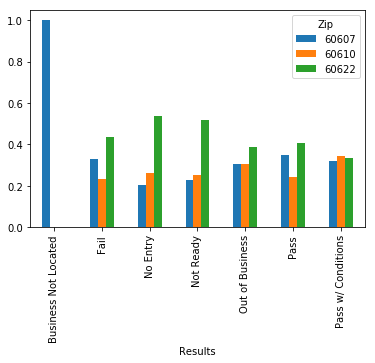

In [21]:
#Pass and fail per area code!
pd.crosstab(food_inspection['Results'], food_inspection['Zip'], normalize="index" ).plot.bar()

In [23]:
#Here are Pass/Fail results percentages for 60607
food_inspection_Food60607['Results'].value_counts(normalize=True)

Pass                    0.603416
Fail                    0.205679
Pass w/ Conditions      0.102493
Out of Business         0.061173
No Entry                0.021930
Not Ready               0.004848
Business Not Located    0.000462
Name: Results, dtype: float64

In [24]:
#Here are Pass/Fail results percentages for 60610
food_inspection_Food60610['Results'].value_counts(normalize=True)

Pass                  0.544365
Fail                  0.187950
Pass w/ Conditions    0.144784
Out of Business       0.079436
No Entry              0.036571
Not Ready             0.006894
Name: Results, dtype: float64

In [25]:
#Here are Pass/Fail results percentages for 60622
food_inspection_Food60622['Results'].value_counts(normalize=True)

Pass                  0.571186
Fail                  0.221761
Pass w/ Conditions    0.088063
Out of Business       0.062795
No Entry              0.047332
Not Ready             0.008863
Name: Results, dtype: float64

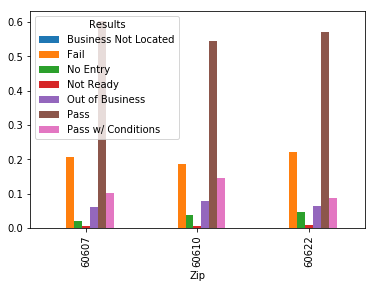

In [26]:
#Here is a nice graph showing the pass/fail results in each zipcode!!
pd.crosstab(food_inspection['Zip'], food_inspection['Results'], normalize="index" ).plot.bar()

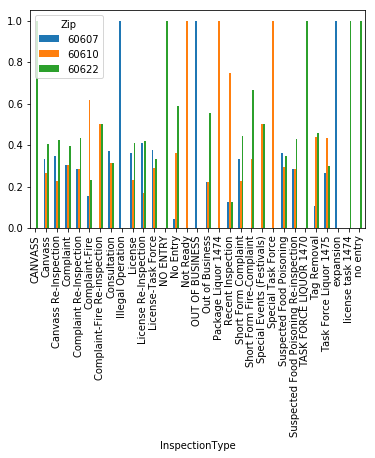

In [27]:
#Let try this for Inspection Type ... nice, but too messy must be a better way...
pd.crosstab(food_inspection['InspectionType'], food_inspection['Zip'], normalize="index" ).plot.bar()

In [28]:
#More detailed look at the inspections ... suspected food poisoning!!
pd.crosstab([food_inspection['Results'], food_inspection['Risk'], food_inspection['InspectionType']], food_inspection['Zip'])

Zip                                                                          60607  \
Results              Risk            InspectionType                                  
Business Not Located Risk 1 (High)   Canvass                                     1   
                                     Short Form Complaint                        1   
Fail                 All             License                                     1   
                     Risk 1 (High)   Canvass                                   421   
                                     Canvass Re-Inspection                      29   
                                     Complaint                                  98   
                                     Complaint Re-Inspection                     8   
                                     Complaint-Fire                              0   
                                     Consultation                                4   
                                     License                                   176   
                                     License Re-Inspection                      11   
                                     License-Task Force                          8   
                                     No Entry                                    0   
                                     Out of Business                             0   
                                     Recent Inspection                           0   
                                     Short Form Complaint                       11   
                                     Short Form Fire-Complaint                   0   
                                     Special Events (Festivals)                  0   
                                     Suspected Food Poisoning                    4   
                                     Suspected Food Poisoning Re-inspection      0   
                                     Tag Removal                                 0   
                                     Task Force Liquor 1475                      1   
                                     no entry                                    0   
                     Risk 2 (Medium) Canvass                                    40   
                                     Canvass Re-Inspection                       3   
                                     Complaint                                  13   
                                     Complaint Re-Inspection                     0   
                                     Consultation                                0   
                                     License                                    32   
                                     License Re-Inspection                       1   
...                                                                            ...   
Pass w/ Conditions   Risk 1 (High)   Canvass Re-Inspection                      46   
                                     Complaint                                  57   
                                     Complaint Re-Inspection                     8   
                                     Complaint-Fire                              1   
                                     Consultation                                2   
                                     License                                    22   
                                     License Re-Inspection                       4   
                                     Recent Inspection                           1   
                                     Short Form Complaint                       14   
                                     Suspected Food Poisoning                    4   
                                     Suspected Food Poisoning Re-inspection      0   
                                     Tag Removal                                 0   
                     Risk 2 (Medium) Canvass                                    26   
                                     Canvass

In [29]:
#Same data with violations ... too long but actually kinda informative. Cool but can't be used in a meeting.
pd.crosstab([food_inspection['Results'], food_inspection['Risk'], food_inspection['Violations']], food_inspection['Zip'])

Zip                                                                                    60607  \
Results            Risk            Violations                                                  
Fail               Risk 1 (High)   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      0   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS P...      1   
                                   10. SEWAGE AND WASTE WATER DISPOSAL, NO BACK SI...      0   
                                   10. SEWAGE AND WASTE WATER DISPOSAL, NO BACK SI...      0   
                                   10. SEWAGE AND WASTE WATER DISPOSAL, NO BACK SI...      0   
...                                                                                      ...   
Pass w/ Conditions Risk 2 (Medium) 70. NO SMOKING REGULATIONS - Comments: FOUND AS...      0   
                                   8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS:...      0   
                                   8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS:...      1   
                                   8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS:...      0   
                                   8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS:...      0   
                                   9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY PR...      0   
                   Risk 3 (Low)    11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, DE...      0   
                                   12. HAND WASHING FACILITIES: WITH SOAP AND SANI...      0   
                                   13. NO EVIDENCE OF RODENT OR 

In [30]:
#Added in Facility type for a full picture!
pd.crosstab([food_inspection['Results'], food_inspection['Risk'], food_inspection['FacilityType'], food_inspection['InspectionType']], food_inspection['Zip'])

Zip                                                                                              60607  \
Results              Risk            FacilityType                    InspectionType                      
Business Not Located Risk 1 (High)   Restaurant                      Short Form Complaint            1   
Fail                 Risk 1 (High)   BANQUET HALL                    Consultation                    0   
                                                                     License                         0   
                                     Bakery                          Canvass                         0   
                                                                     Canvass Re-Inspection           0   
                                     Banquet rooms                   License                         1   
                                     CHURCH                          Special Events (Festivals)      0   
                                     CULINARY ARTS SCHOOL            Canvass                         0   
                                     CULINARY SCHOOL                 Canvass                         0   
                                     Catering                        Canvass                         6   
                                                                     Canvass Re-Inspection           0   
                                                                     Complaint                       0   
                                                                     Complaint Re-Inspection         0   
                                                                     License                         4   
                                                                     License Re-Inspection           0   
                                                                     Suspected Food Poisoning        0   
                                     Children's Services Facility    Canvass                         3   
                                                                     Canvass Re-Inspection           1   
                                                                     License                        10   
                                                                     License Re-Inspection           2   
                                     DAY CARE                        License                         0   
                                     Daycare (2 - 6 Years)           Canvass                         1   
                                                                     License                         0   
                                     Daycare (2 Years)               License                         1   
                                     Daycare (Under 2 Years)         License                         2   
                                                                     License Re-Inspection           1   
                                     Daycare Above and Under 2 Years Canvass                         2   
                                                                     Complaint                       2   
                                                                     License                         8   
                                                                     License Re-Inspection           1   
...                                                                                                ...   
Pass w/ Conditions   Risk 2 (Medium) Grocery Store                   Canvass Re-Inspection           0   
                                                                     Complaint                       2   
                                                                     Complaint Re-Inspection         0   
                                                                     Short Form Complaint            0   
                                     Liquor                          Complaint

In [31]:
#attempting to see the effects (reactions) of inspection date and results.
inspections=['LicenseNum', 'DBAName', 'InspectionDate', 'InspectionType', 'Results']

In [32]:
#checking to see our new segment.
food_inspection[inspections].head(10)

,LicenseNum,DBAName,InspectionDate,InspectionType,Results
0,20575,ST CHRYSOSTOM'S CHURCH DAY SCHOOL,1/5/2010,License,Fail
1,75567,CHICAGO SINAI CONGREGATION,1/5/2010,License,Fail
2,36436,BLUE PLATE CATERING LTD.,1/5/2010,Consultation,Pass
3,1820997,"LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC",1/5/2010,Out of Business,Pass
4,1916128,"LOVEBUGS, TODDLER PROGRAMS AND PRESCHOOL, LLC",1/5/2010,License,Pass
5,1991022,PAKEEZA,1/5/2010,License Re-Inspection,Pass
6,1619550,MR. GYROS INC,1/6/2010,Short Form Complaint,Fail
7,29507,POLK STREET CO.,1/6/2010,Canvass,Fail
8,2013495,FILTER COFFEE LOUNGE,1/6/2010,Consultation,Fail
9,1932046,CHICAGO CAFE CATERERS,1/6/2010,Canvass,Pass


In [33]:
#we get a good view of the inspect process of this business.
'''Below you can see that after a complaint on 09/16/10 the business failed the inspection, 
shortly after a re-inspection was conducted on 09/23/10 and resulted in a pass. The company got lazy in 2016 and
failed another inspection.'''
food_inspection[inspections][food_inspection['LicenseNum']==1357411].sort_values(by=['DBAName']) #ascending=1

,LicenseNum,DBAName,InspectionDate,InspectionType,Results
985,1357411,10 PIN BOWLING LOUNGE,9/16/2010,Complaint,Fail
1026,1357411,10 PIN BOWLING LOUNGE,9/23/2010,Complaint Re-Inspection,Pass
1150,1357411,10 PIN BOWLING LOUNGE,10/18/2010,Short Form Complaint,Pass
4569,1357411,10 PIN BOWLING LOUNGE,8/12/2013,Canvass,Pass w/ Conditions
6689,1357411,10 PIN BOWLING LOUNGE,9/30/2014,Canvass,Pass w/ Conditions
7842,1357411,10 PIN BOWLING LOUNGE,6/8/2015,Canvass,Pass w/ Conditions
10068,1357411,10 PIN BOWLING LOUNGE,8/2/2016,Canvass,Fail
10119,1357411,10 PIN BOWLING LOUNGE,8/9/2016,Canvass Re-Inspection,Pass
11609,1357411,10 PIN BOWLING LOUNGE,5/15/2017,Canvass,Pass
12951,1357411,10 PIN BOWLING LOUNGE,5/31/2018,Canvass Re-Inspection,Pass


In [34]:
#Thank you! This was fun! I will continue to discover and learn more!